### Library
[e-book link](https://bookdown.org/compfinezbook/introcompfinr/Determining-the-Global.html)

In [1]:
library(corrplot)
library(MASS)
library(lmtest)
library(car)
library(tseries)
library(forecast)
# library(psych)
# library(plm)
library(tidyverse)
library(readxl)
# library(quantmod)
library(zoo)
library(ggpubr)
library(nortest)
op=options(repr.plot.width=10, repr.plot.height=8)
library(reshape2)

corrplot 0.92 loaded

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()

Attaching package: ‘ggpubr’


The following object is masked from ‘package:forecast’:

    gghistogram



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

  

In [2]:
# calculate return
fRetId = function(x, de=1){
    len = length(x)
    ret = diff(x, de)/x[1:(len-de)]
    return(ret)
}

# calculate return for 2-stock portfolio
fRet = function(x1="TSLA", x2, n1=19, n2, h1=108.1, h2){
    
    # total money inc.
    x1 = n1*df1[[x1]]
    x2 = n2*df1[[x2]]
    xt = x1+x2
    len=nrow(xt)
    
    # return
    ret = fRetId(xt)
    return(ret)
}

In [3]:
sim1 = "aces akra amrt bbni brpt cpin essa goto hrum indy inkp medc scma srtg tlkm tpia untr unvr jpfa tins towr tbig sido pgas icbp excl arto emtk klbf mdka"
sim1 = toupper(paste(strsplit(sim1, " ")[[1]], "jk", sep="."))
length(sim1)

[1] 30

In [4]:
table(sim1)

sim1
ACES.JK AKRA.JK AMRT.JK ARTO.JK BBNI.JK BRPT.JK CPIN.JK EMTK.JK ESSA.JK EXCL.JK 
      1       1       1       1       1       1       1       1       1       1 
GOTO.JK HRUM.JK ICBP.JK INDY.JK INKP.JK JPFA.JK KLBF.JK MDKA.JK MEDC.JK PGAS.JK 
      1       1       1       1       1       1       1       1       1       1 
SCMA.JK SIDO.JK SRTG.JK TBIG.JK TINS.JK TLKM.JK TOWR.JK TPIA.JK UNTR.JK UNVR.JK 
      1       1       1       1       1       1       1       1       1       1 

In [5]:
nam1 = paste("v", 101:130, sep="")

df1 = list()
for (j in sim1){
    k = get.hist.quote(j, "2022-06-27", end="2023-06-26",
          quote="C", provider = c("yahoo"), compression = "w")
    k = na.omit(k)
    k = ts(k, freq=5)
    df1[[j]] = k
}
df1 = as.data.frame(sapply(df1, c))
colnames(df1) = nam1

In [6]:
ret1 = as.data.frame(apply(df1,2,fRetId))

In [7]:
cor1 = cor(ret1)
cov1 = cov(ret1)

In [8]:
set.seed(10)
mu1 = 10+abs(apply(ret1,2,mean)*10)
# mu2 = abs(apply(ret1,2,mean)*100+runif(30,0,0.3))
# mu3 = abs(apply(ret1,2,mean)*100+runif(30,-0.3,0))
# mu4 = abs(apply(ret1,2,mean)*100+runif(30,-0.5,0.5))
# mu2 = abs(mu1[c(11:30,1:10)]-0.1)
# mu3 = abs(mu1[c(21:30,1:20)]+0.05)
# mu4 = abs(mu1[c(26:30,1:25)]+0.1)

mu2 = mu1-runif(30,0.005,0.01)

mu3 = 10+abs(apply(ret1,2,mean)*12)
mu4 = mu1+runif(30,0.003, 0.006)


mu1 = as.numeric(mu1)
mu2 = as.numeric(mu2)
mu3 = as.numeric(mu3)
mu4 = as.numeric(mu4)


In [9]:
diag(cov1)^0.5

v101       v102       v103       v104       v105       v106       v107 
0.06612302 0.04927370 0.04637296 0.03041635 0.05163480 0.03675680 0.08324662 
      v108       v109       v110       v111       v112       v113       v114 
0.11254000 0.05742596 0.06496613 0.04412887 0.07563440 0.05832665 0.05497477 
      v115       v116       v117       v118       v119       v120       v121 
0.03107762 0.03540308 0.05007111 0.03522705 0.03834256 0.04756268 0.03315470 
      v122       v123       v124       v125       v126       v127       v128 
0.03062466 0.04174861 0.04309994 0.02786840 0.04447067 0.10672863 0.07438620 
      v129       v130 
0.03650413 0.05802179

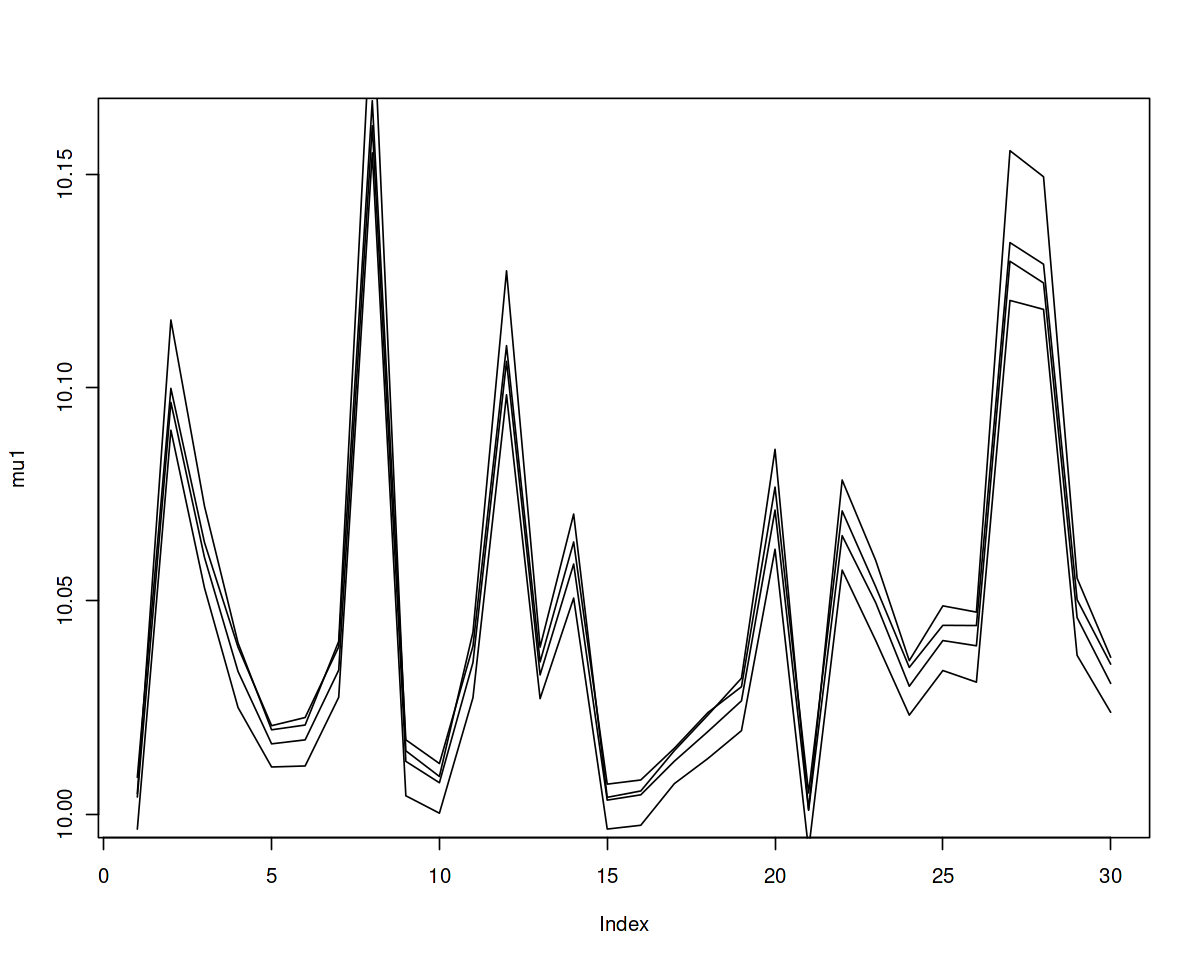

In [10]:
plot(mu1, type="l")
lines(mu2); lines(mu3); lines(mu4)

In [11]:
# load library MASS 
library(MASS) 

# set seed and create data vectors 
set.seed(10)

# create multivariate normal distribution 
mv1 <- mvrnorm(n = 50, mu = mu1, Sigma = cov1) 
mv2 <- mvrnorm(n = 50, mu = mu2, Sigma = cov1) 
mv3 <- mvrnorm(n = 50, mu = mu3, Sigma = cov1) 
mv4 <- mvrnorm(n = 50, mu = mu4, Sigma = cov1) 

df2 = as.data.frame(cbind("group"=rep(1:4, each=50), rbind(mv1,mv2,mv3,mv4)))
df2$group = as.factor(df2$group)

# apply(df2[df2$group==1,-1],2 , mean) - mu1
# apply(df2[df2$group==2,-1],2 , mean) - mu2
# apply(df2[df2$group==3,-1],2 , mean) - mu3
# apply(df2[df2$group==4,-1],2 , mean) - mu4



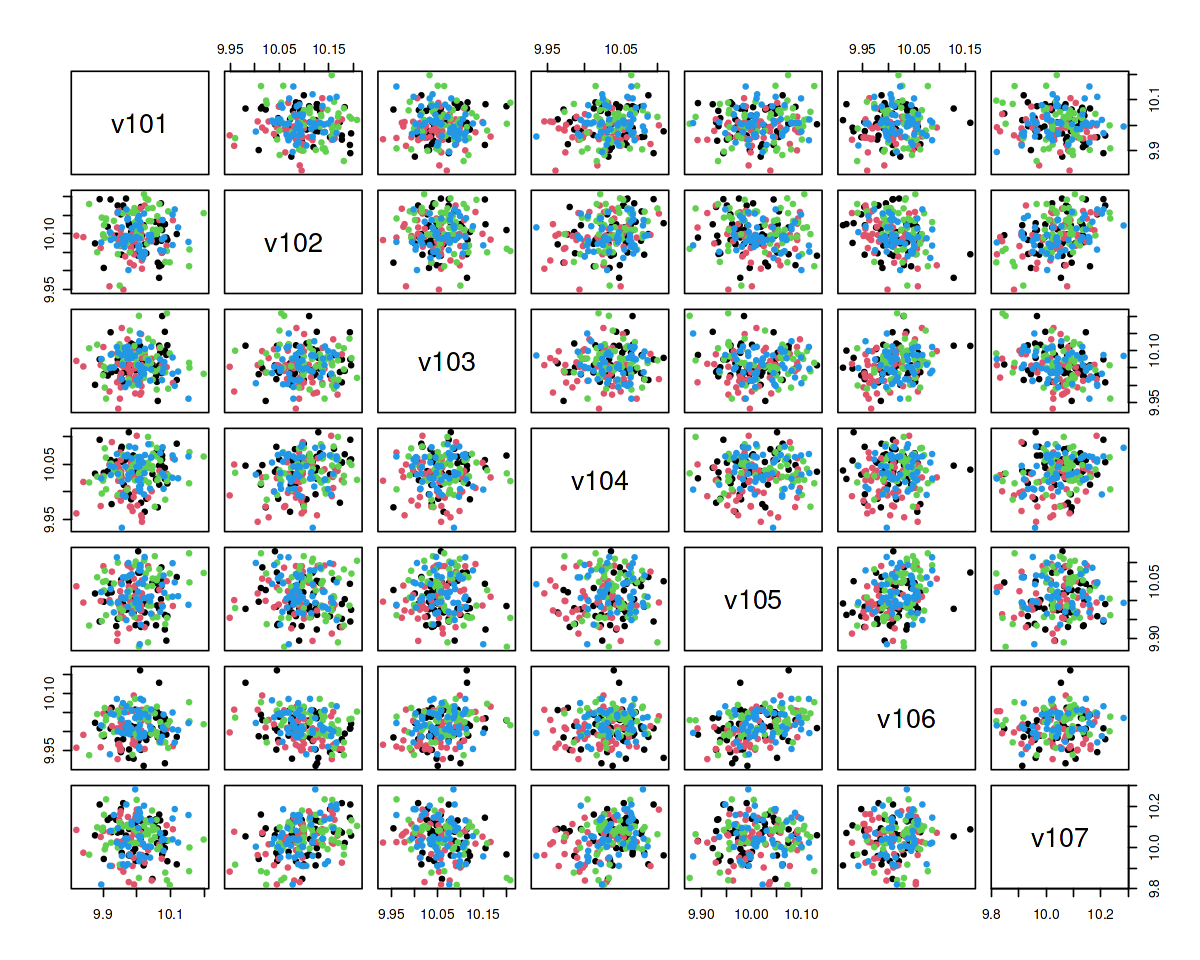

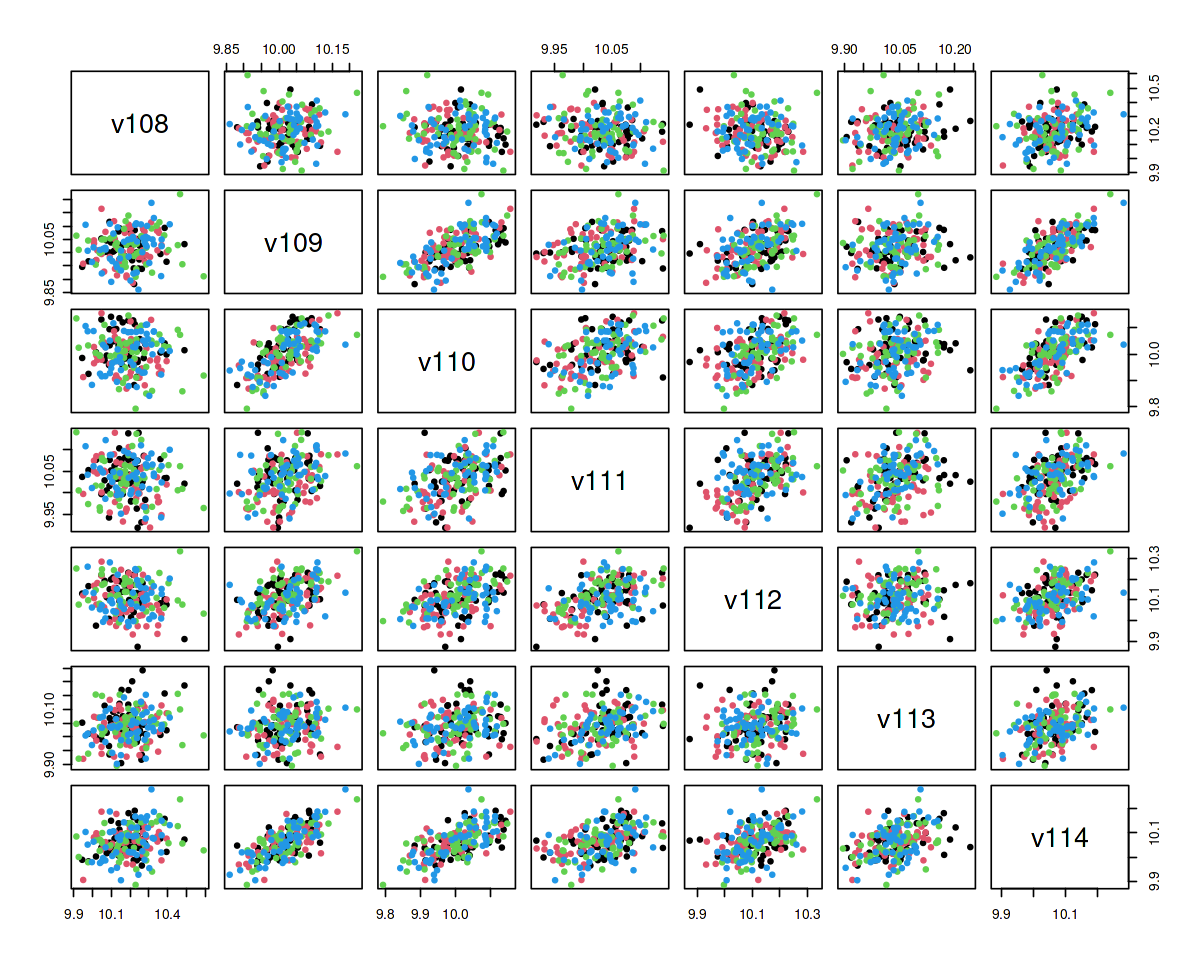

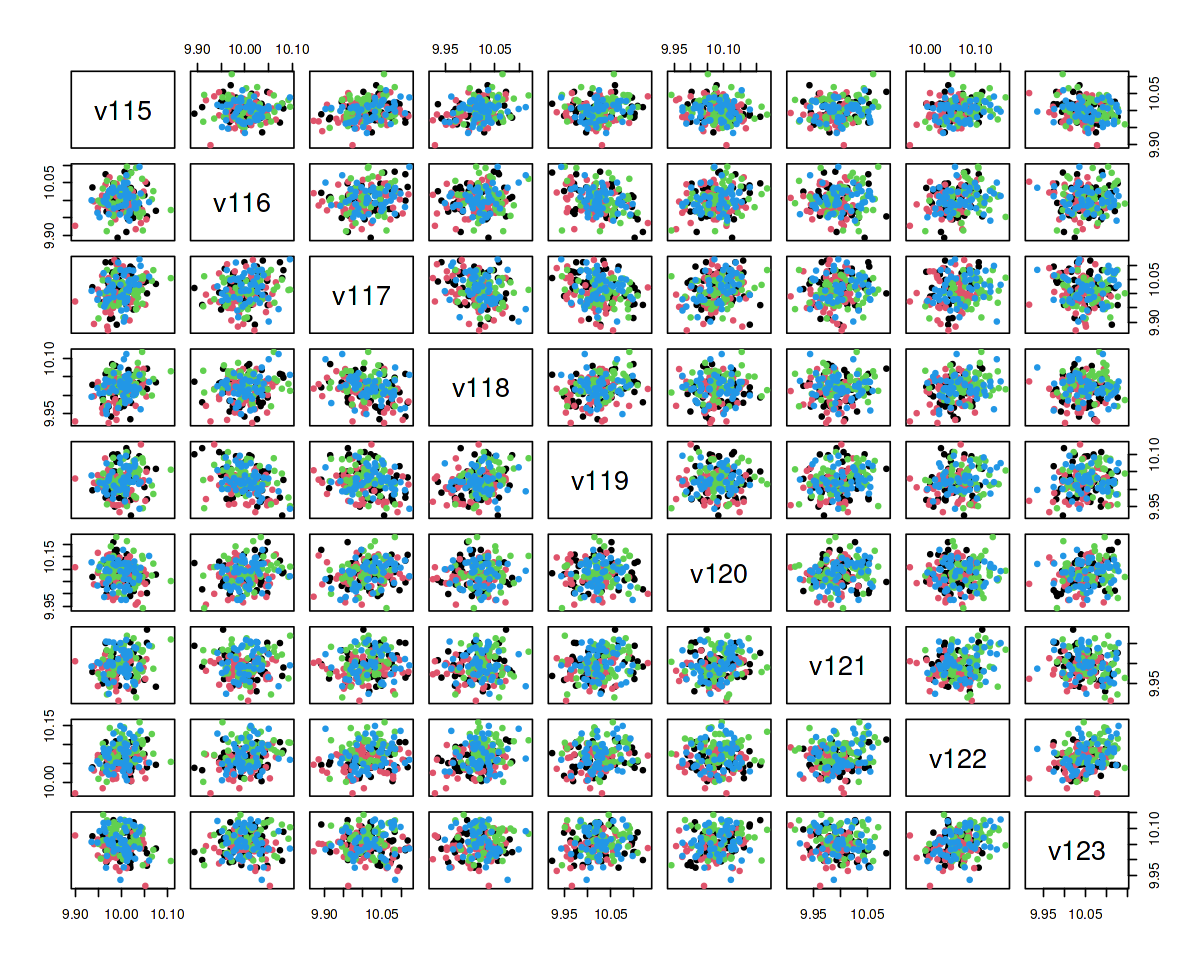

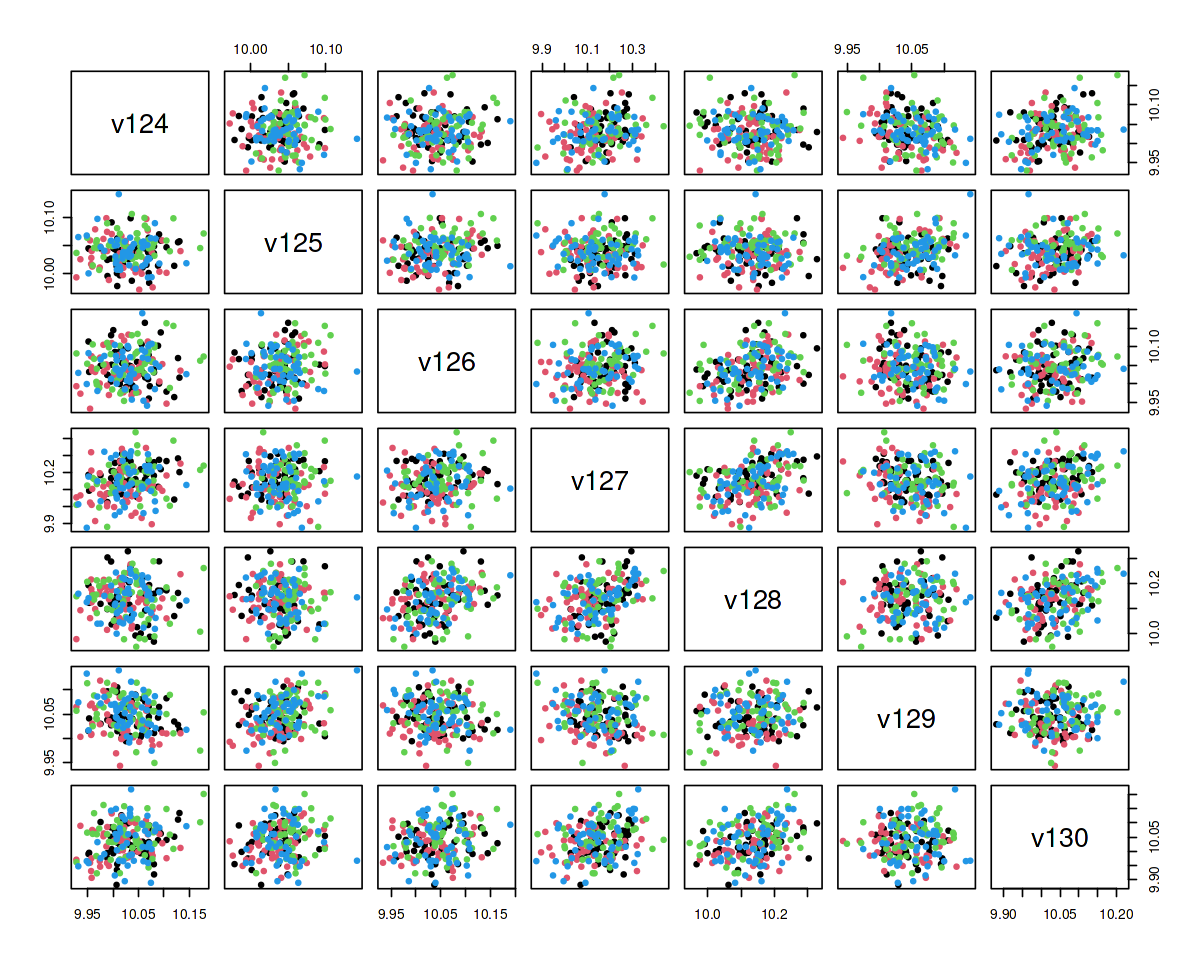

In [12]:
plot(df2[,2:8], col=df2$group, pch=20)
plot(df2[,9:15], col=df2$group, pch=20)
plot(df2[,16:24], col=df2$group, pch=20)
plot(df2[,25:31], col=df2$group, pch=20)

In [13]:
head(df2)

group v101      v102     v103     v104     v105      v106      v107     
1 1     10.056510 10.07741 10.02568 10.02277  9.934177 10.036833 10.137530
2 1      9.942983 10.17647 10.07470 10.05277  9.951290  9.978050 10.072820
3 1     10.117934 10.09937 10.01511 10.08715 10.062373  9.986473  9.918047
4 1     10.090100 10.08349 10.11598 10.01548  9.958580 10.020334  9.933195
5 1      9.988804 10.06850 10.11758 10.06597 10.001363  9.989873  9.979057
6 1     10.087079 10.08983 10.08785 10.02469  9.893601  9.992550 10.032325
  v108     v109      ⋯ v121      v122     v123      v124     v125     v126    
1 10.07515 10.045321 ⋯  9.961520 10.07832 10.069111 10.05620 10.05093 10.10666
2 10.17389  9.985756 ⋯  9.998424 10.01397 10.027376 10.06317 10.04506 10.01765
3 10.26634  9.981792 ⋯  9.998447 10.04610 10.112307 10.03452 10.09865 10.04807
4 10.39376  9.965462 ⋯ 10.003548 10.05150 10.019667 10.08066 10.04905 10.03132
5 10.14224  9.967589 ⋯ 10.051799 10.03942  9.980948 10.00759 10.00127 10.06557
6 10.20475 10.013038 ⋯  9.930978 10.08890 10.096600 10.08034 10.03664 10.03894
  v127     v128      v129     v130     
1 10.13821 10.146917 10.00712 10.002784
2 10.15969 10.090525 10.07588 10.012302
3 10.26643 10.268269 10.00415 10.053893
4 10.26084 10.157859 10.01085  9.916851
5 10.20074 10.090853 10.05926  9.932642
6 10.18169  9.965898 10.05638  9.953135

In [14]:
write.csv(df2, "data_sim1.csv", row.names=F)

### Viz 1
1. variance and corelation
1. mean

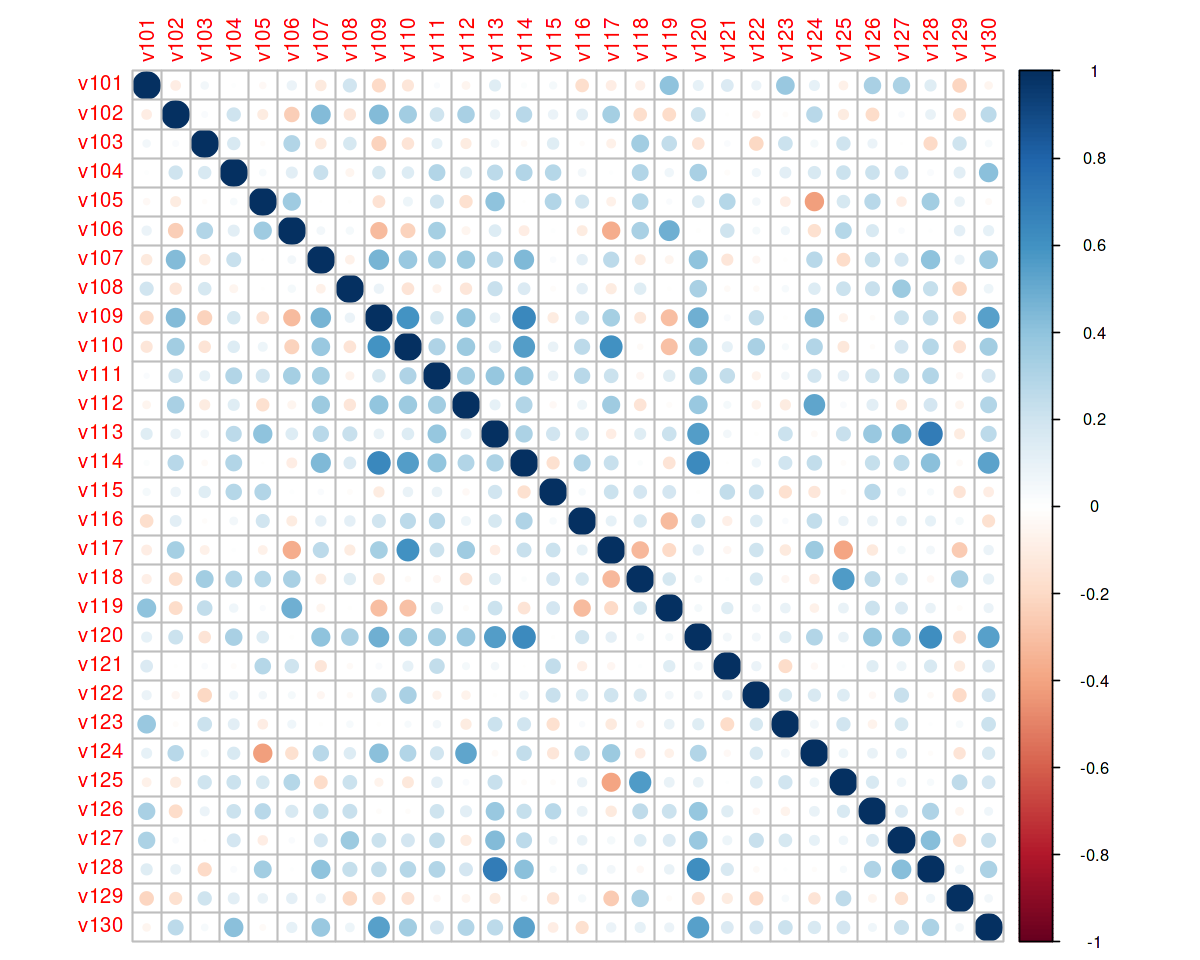

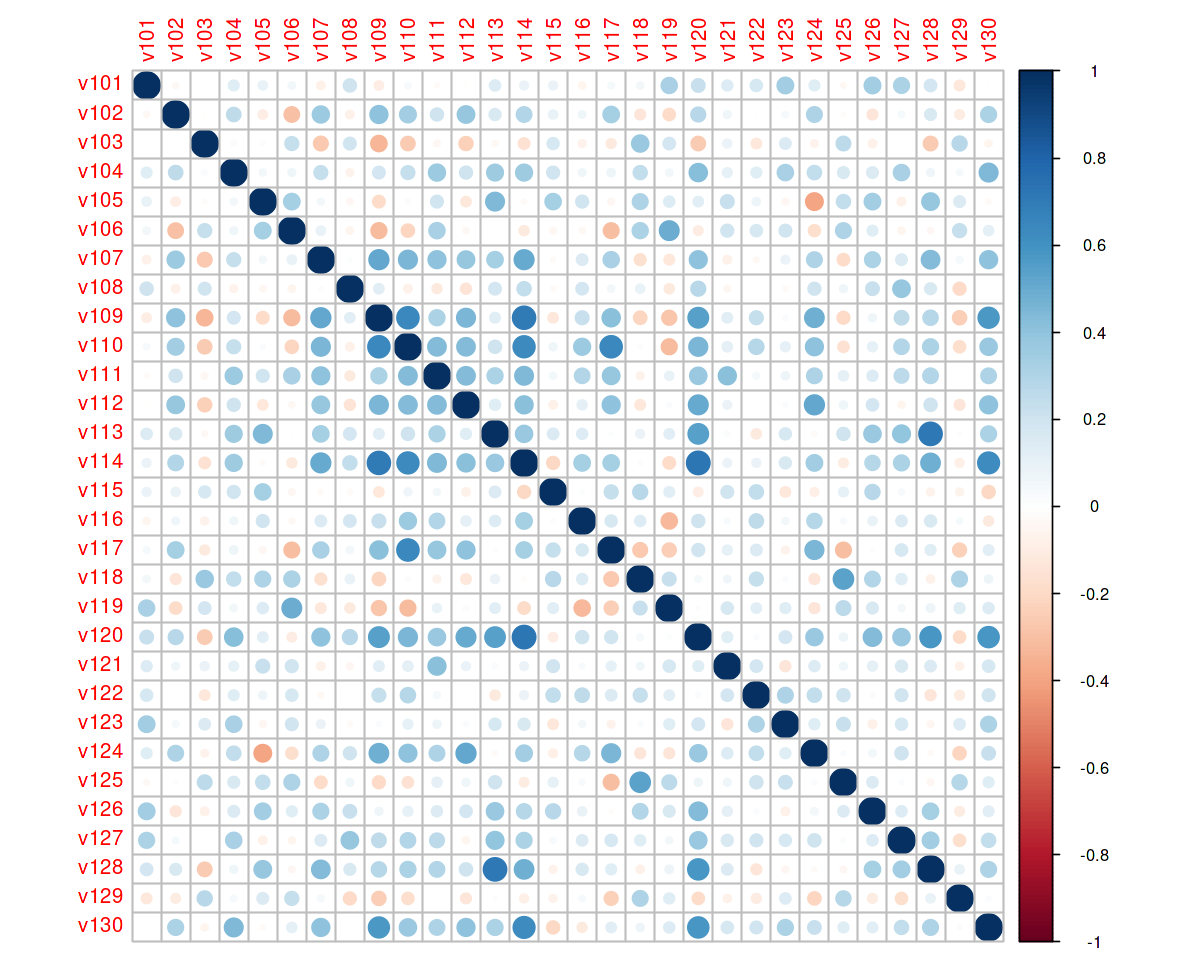

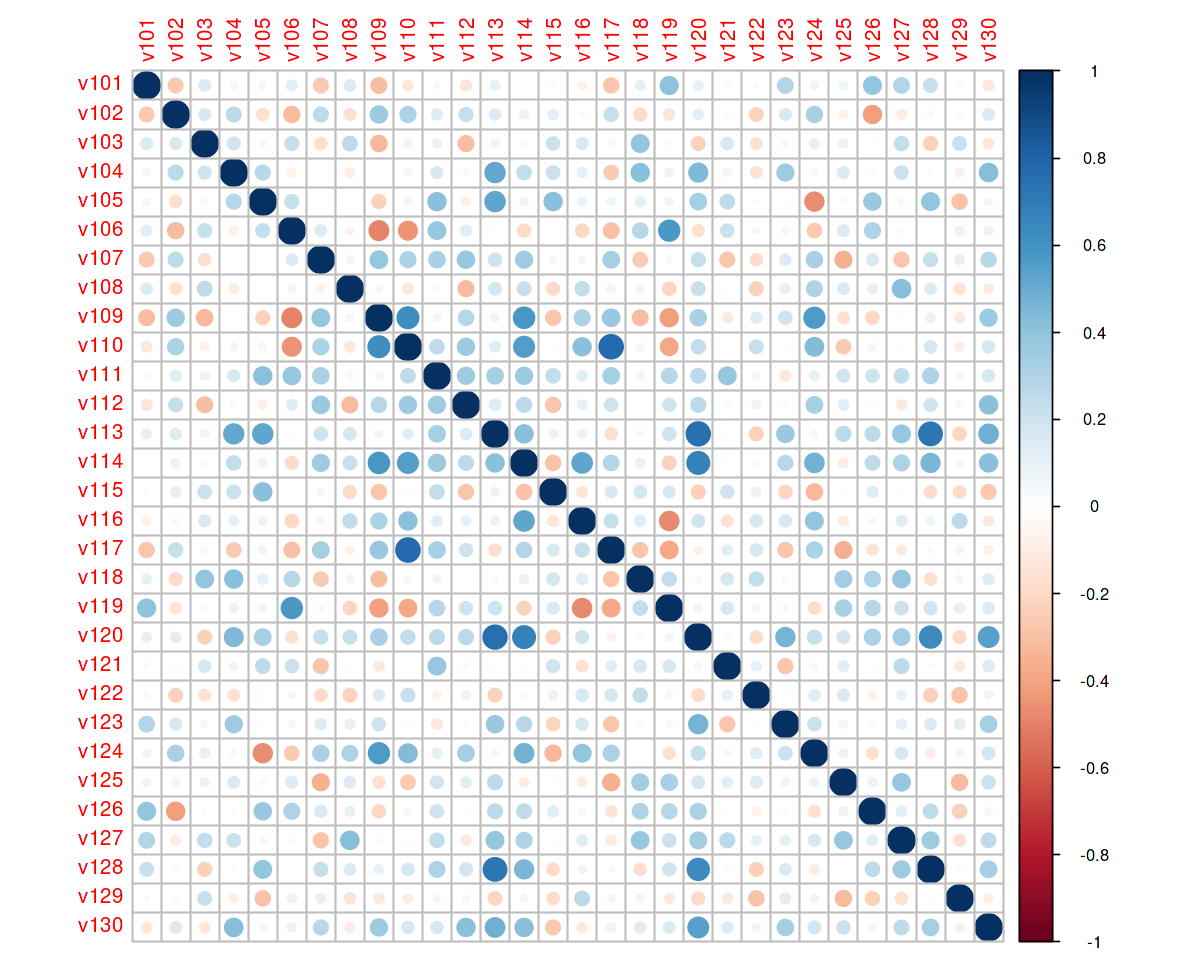

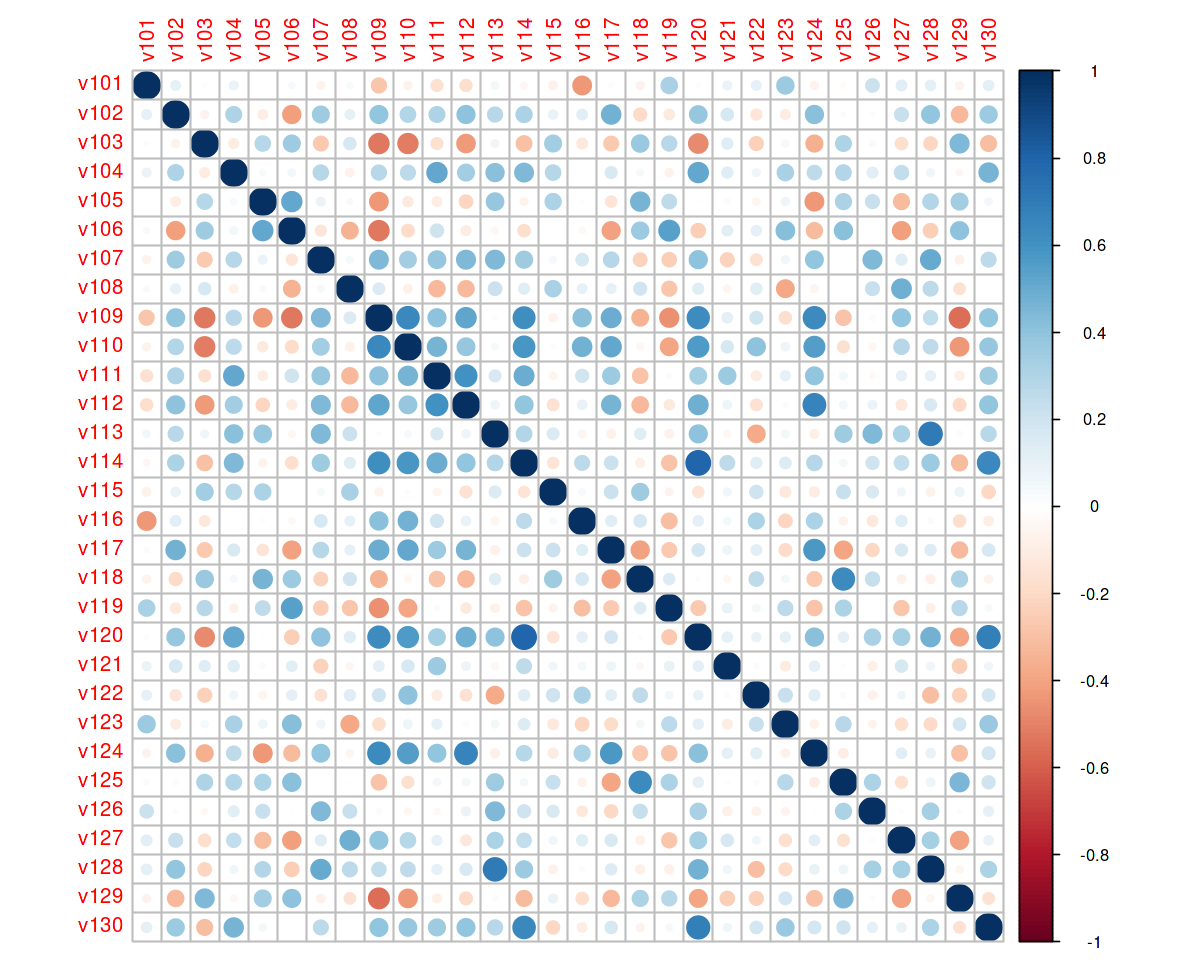

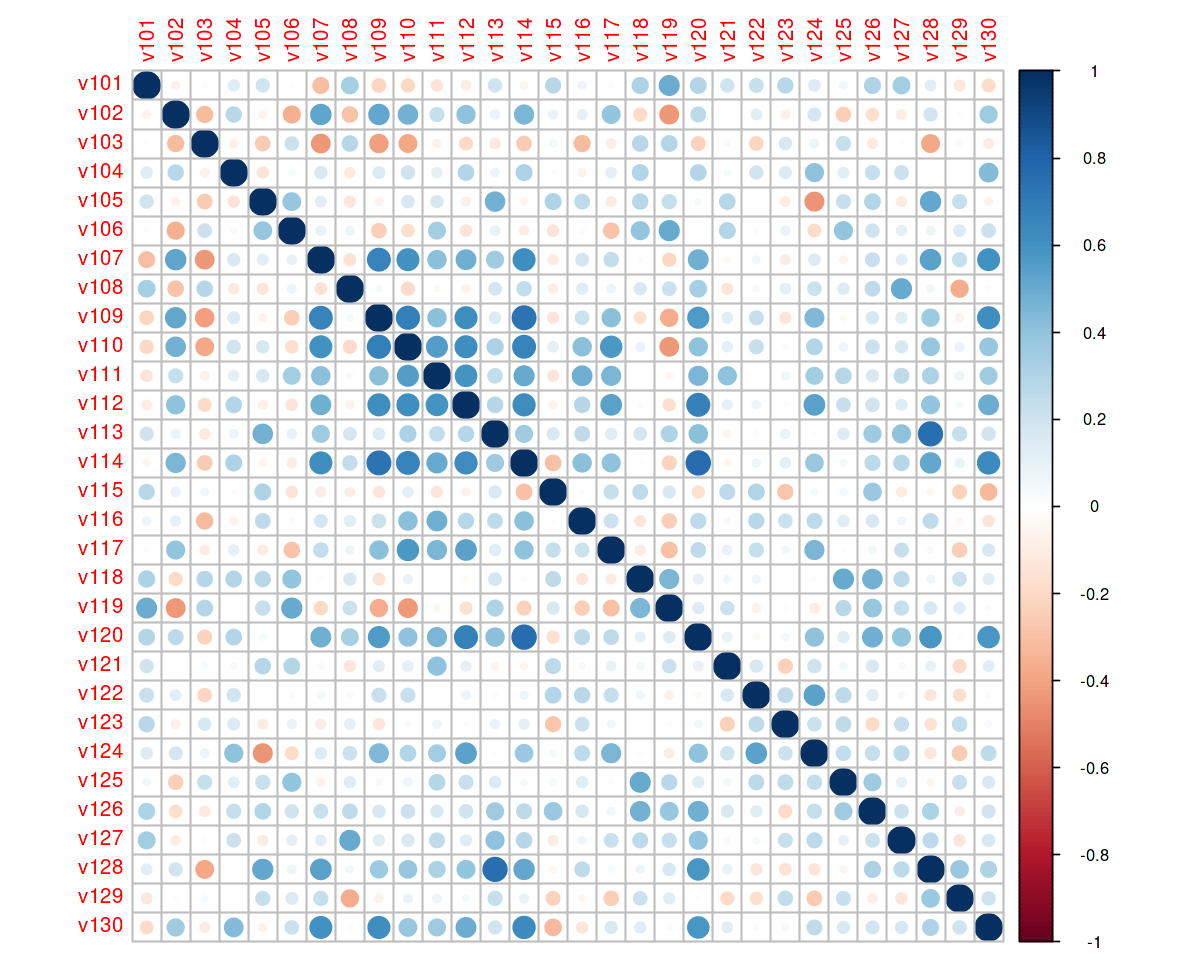

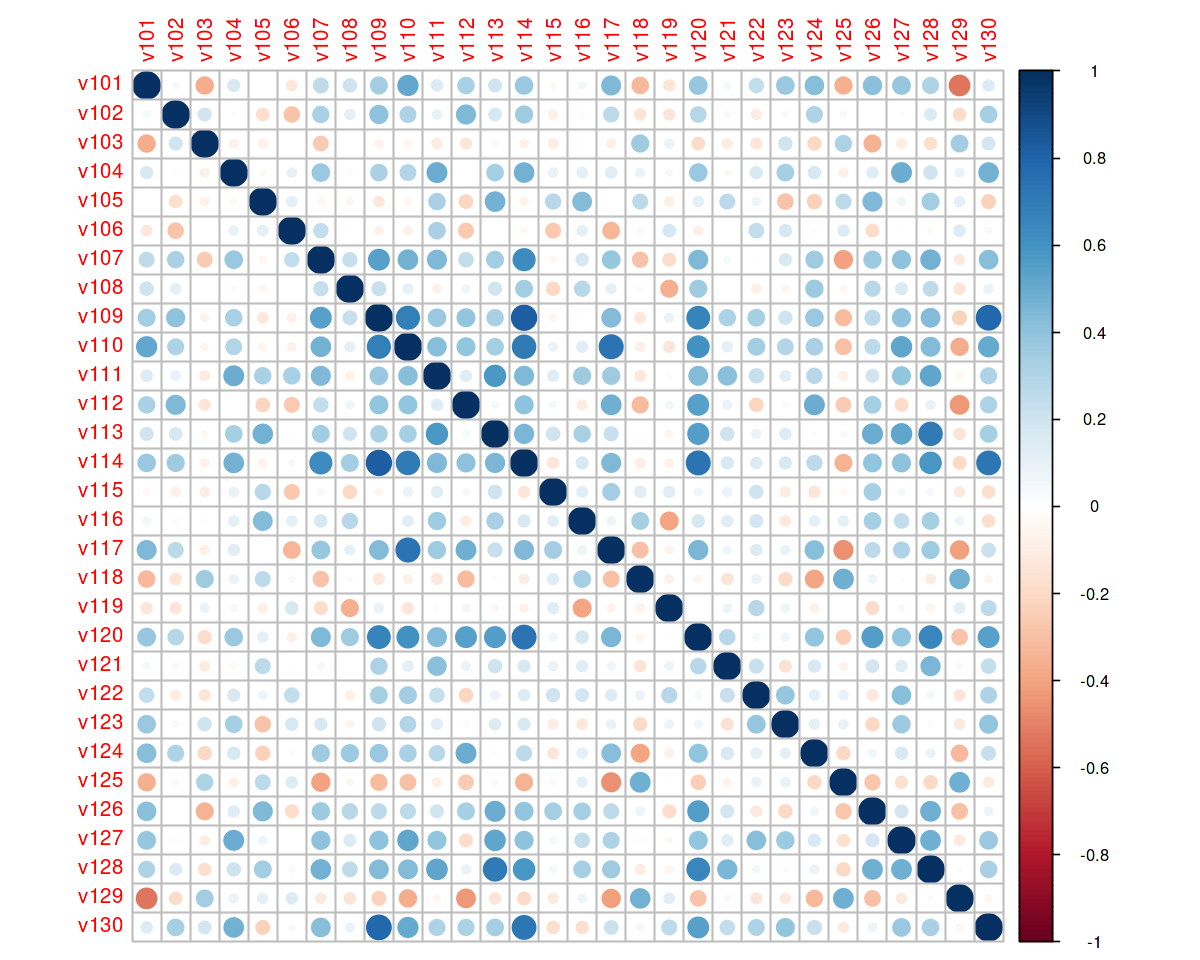

In [15]:
cor2 = cor(df2[,-1])

corrplot(cor1)
corrplot(cor2)

cor2a = cor(df2[df2$group==1,-1])
cor2b = cor(df2[df2$group==2,-1])
cor2c = cor(df2[df2$group==3,-1])
cor2d = cor(df2[df2$group==4,-1])

corrplot(cor2a)
corrplot(cor2b)
corrplot(cor2c)
corrplot(cor2d)

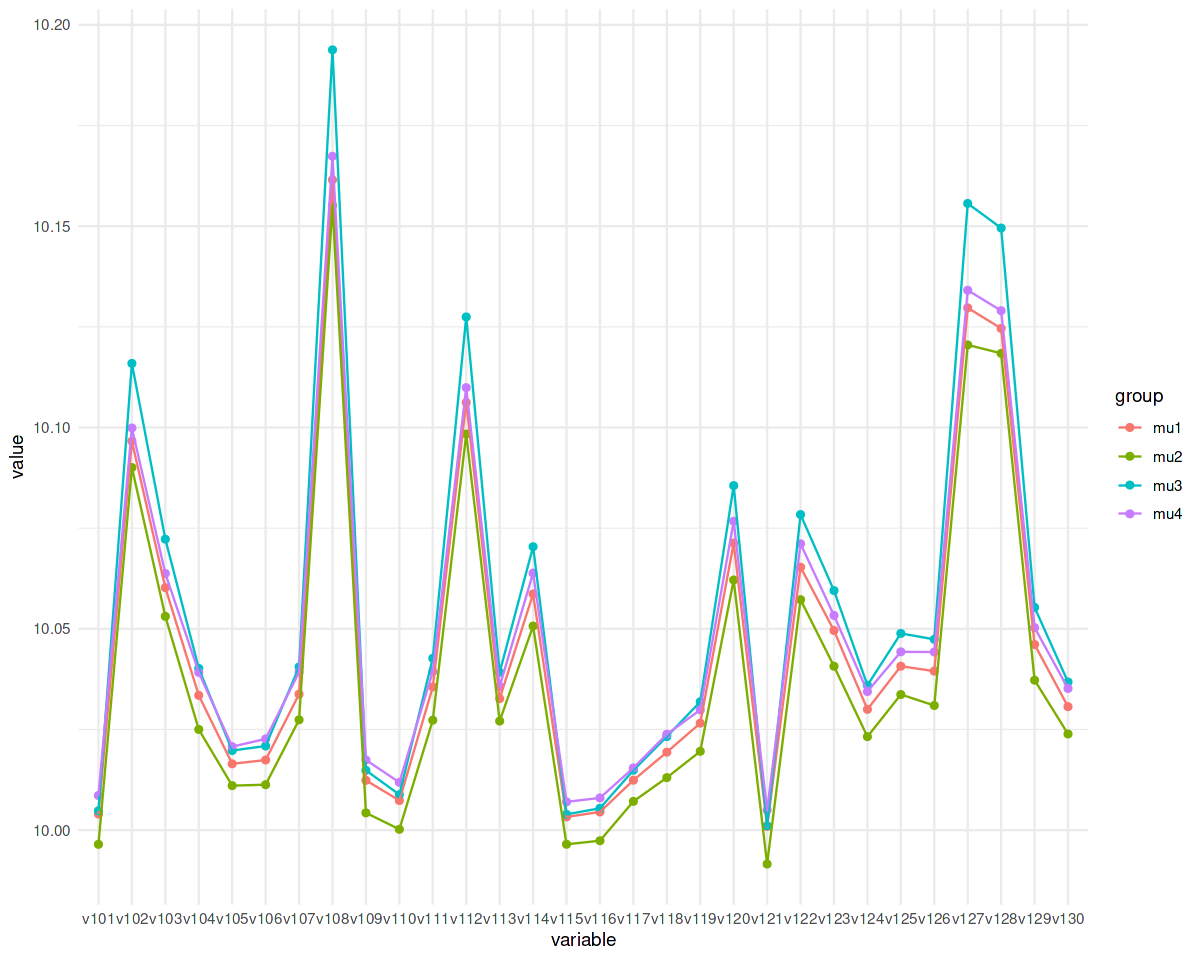

In [16]:
viz2 = as.data.frame(rbind(mu1,mu2,mu3,mu4))
colnames(viz2) = nam1
viz2$group=rownames(viz2)


viz2l <- melt(viz2, id.var=c("group"))
viz2l$group = as.factor(viz2l$group)

pv <- ggplot(viz2l, aes(x=variable, y=value, col=group))
pv + geom_point() + geom_line(aes(group=group)) + theme_minimal()



In [17]:
# plot(mu1, type="b", pch=20, col=11, ylim=c(0,1.8), 
#      ylab="Simulated Mean", xlab="Variable")

# lines(mu2, pch=20, col=12)
# points(mu2, pch=20, col=12)

# lines(mu3, pch=20, col=13)
# points(mu3, pch=20, col=13)

# lines(mu4, pch=20, col=14)
# points(mu4, pch=20, col=14)

# legend("topright",legend=paste("Group",1:4,"   "), pch=20, col=11:14, bty="n")


In [18]:
av2 <- df2 %>% group_by(group) %>% 
  summarise(across(everything(), mean),
            .groups = 'drop')  %>%
  as.data.frame()
av2

group v101      v102     v103     v104     v105     v106     v107    
1 1     10.008510 10.09801 10.06245 10.04013  9.99990 10.00797 10.05288
2 2      9.979698 10.09005 10.04683 10.01850 10.00589 10.00274 10.02823
3 3     10.006877 10.11313 10.06860 10.04010 10.02416 10.02558 10.04851
4 4     10.008912 10.09469 10.05929 10.03839 10.02206 10.02078 10.04978
  v108     v109     ⋯ v121      v122     v123     v124     v125     v126    
1 10.18607 10.01238 ⋯  9.996847 10.05861 10.04761 10.03912 10.03551 10.04289
2 10.18450 10.01871 ⋯  9.982821 10.05410 10.03737 10.01946 10.03323 10.03193
3 10.19886 10.01912 ⋯ 10.000879 10.08584 10.06573 10.03349 10.05140 10.05428
4 10.19462 10.01916 ⋯  9.999580 10.06951 10.05307 10.03084 10.03957 10.04380
  v127     v128     v129     v130    
1 10.16953 10.13825 10.04283 10.02939
2 10.11434 10.13468 10.03361 10.02501
3 10.16159 10.13476 10.05251 10.05106
4 10.14327 10.13350 10.05326 10.03925

In [19]:
av3 = pivot_longer(df2, cols=2:31, names_to="var", values_to="mean")
head(av3)

group var  mean     
1 1     v101 10.056510
2 1     v102 10.077408
3 1     v103 10.025683
4 1     v104 10.022768
5 1     v105  9.934177
6 1     v106 10.036833

In [20]:
av2a = as.data.frame(t(av2))
av2a = av2a[-1,]
names(av2a) = paste("G", 1:4, sep="")
av2a$var = rownames(av2a)
av2a = pivot_longer(av2a, 1:4, names_to="group", values_to="mean")

In [21]:
head(av2a)

var  group mean     
1 v101 G1    10.008510
2 v101 G2     9.979698
3 v101 G3    10.006877
4 v101 G4    10.008912
5 v102 G1    10.09801 
6 v102 G2    10.09005

In [22]:
# av2a %>% mutate(group=as.factor(group)) %>%
# ggplot(aes(x=var, y=mean, col=group)) + 
#   geom_line() +
#   geom_point() + 
#   labs(x="Variabel", y = "Mean") +
#   theme_minimal()

In [23]:
# plotmeans(as.formula("v1~Group"), df2)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation ideoms with `aes()`”


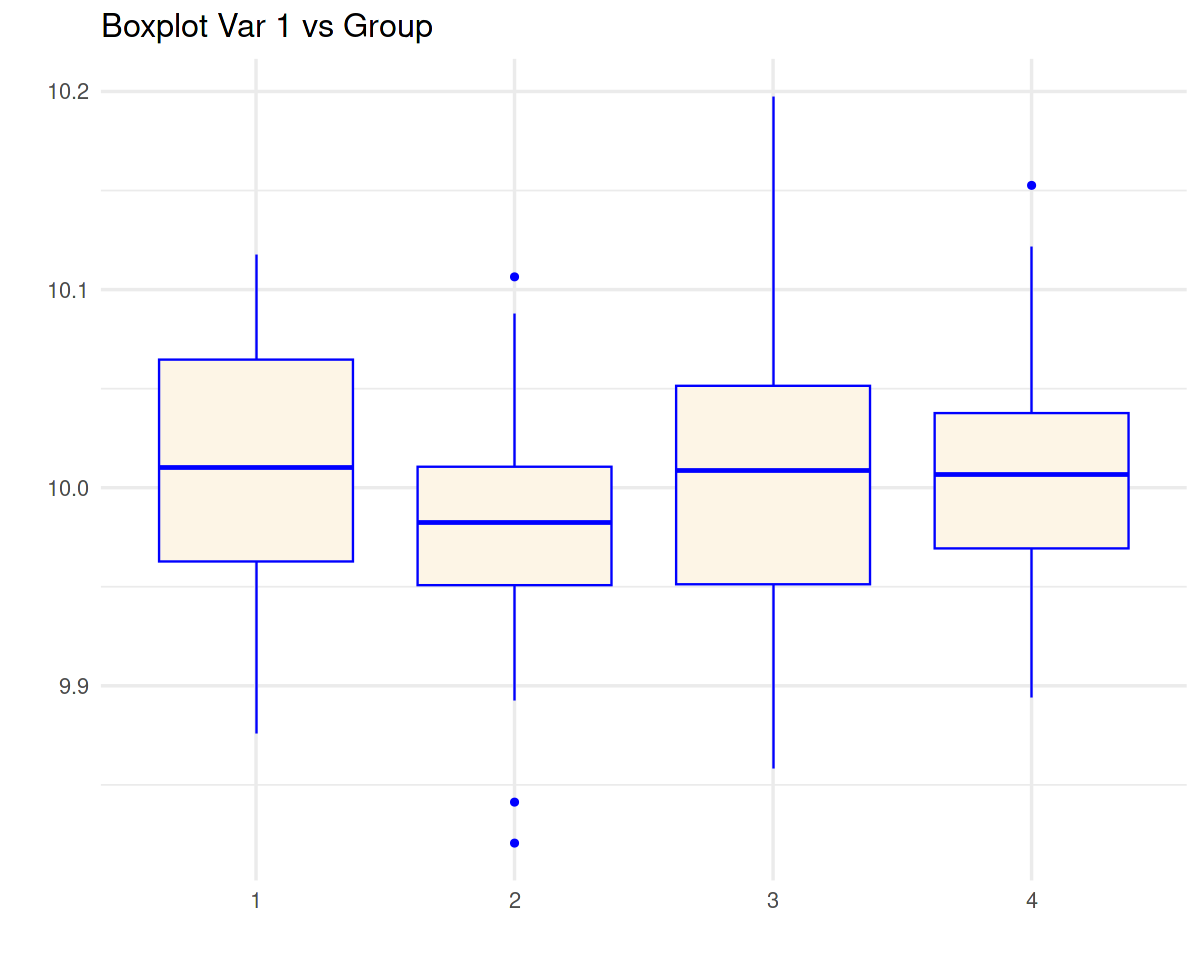

In [24]:

(ggplot(df2, aes_string(y = "v101", x = "group", group = "group")) + 
    geom_boxplot(col="blue", fill="oldlace")+
    theme_minimal(base_size=16)+
    labs(title=paste("Boxplot Var 1 vs Group"), x="", y="")) %>% print()


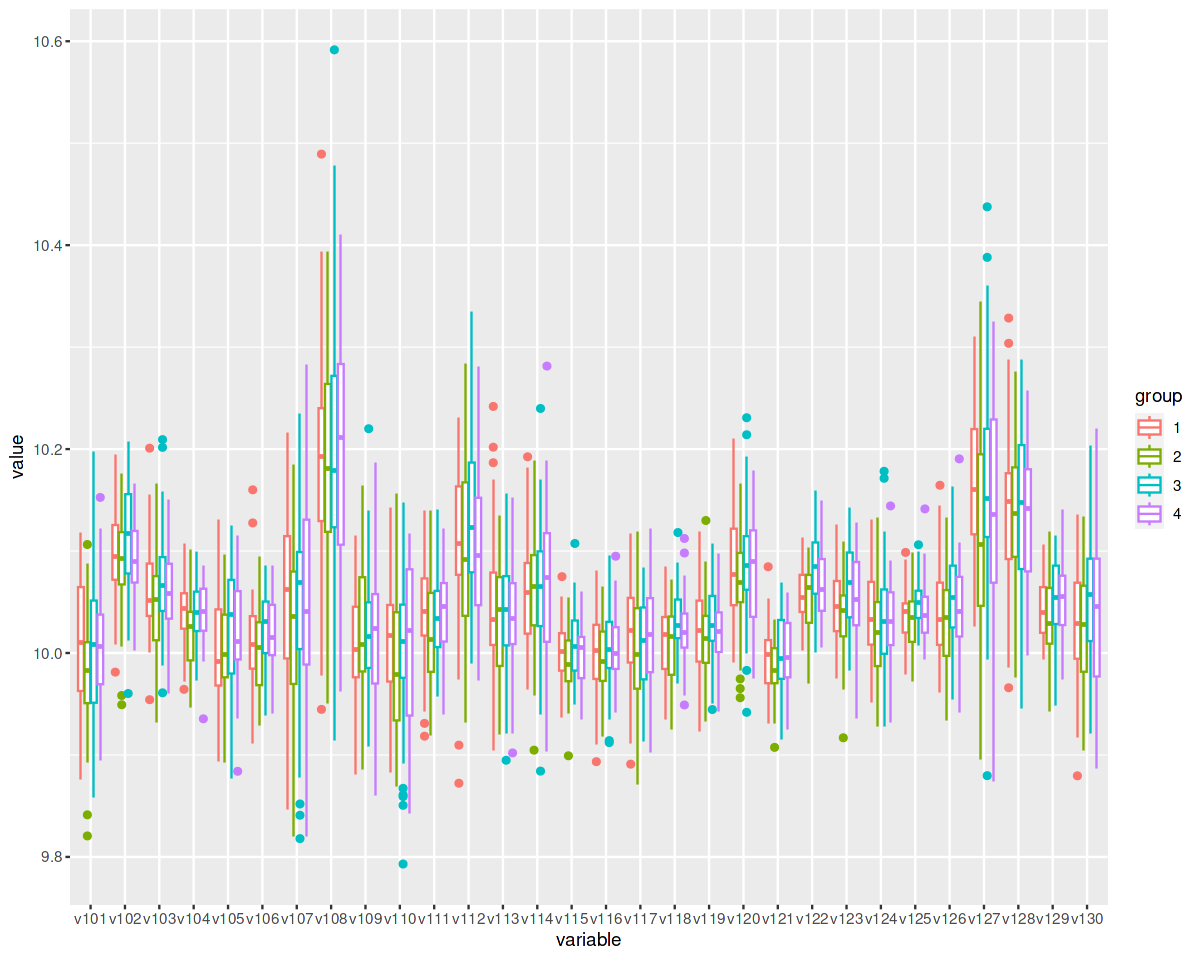

In [25]:

df2l <- melt(df2, id.var=c("group"))
df2l$group = as.factor(df2l$group)

p <- ggplot(df2l, aes(x=variable, y=value, col=group))
p + geom_boxplot(aes(col=group))


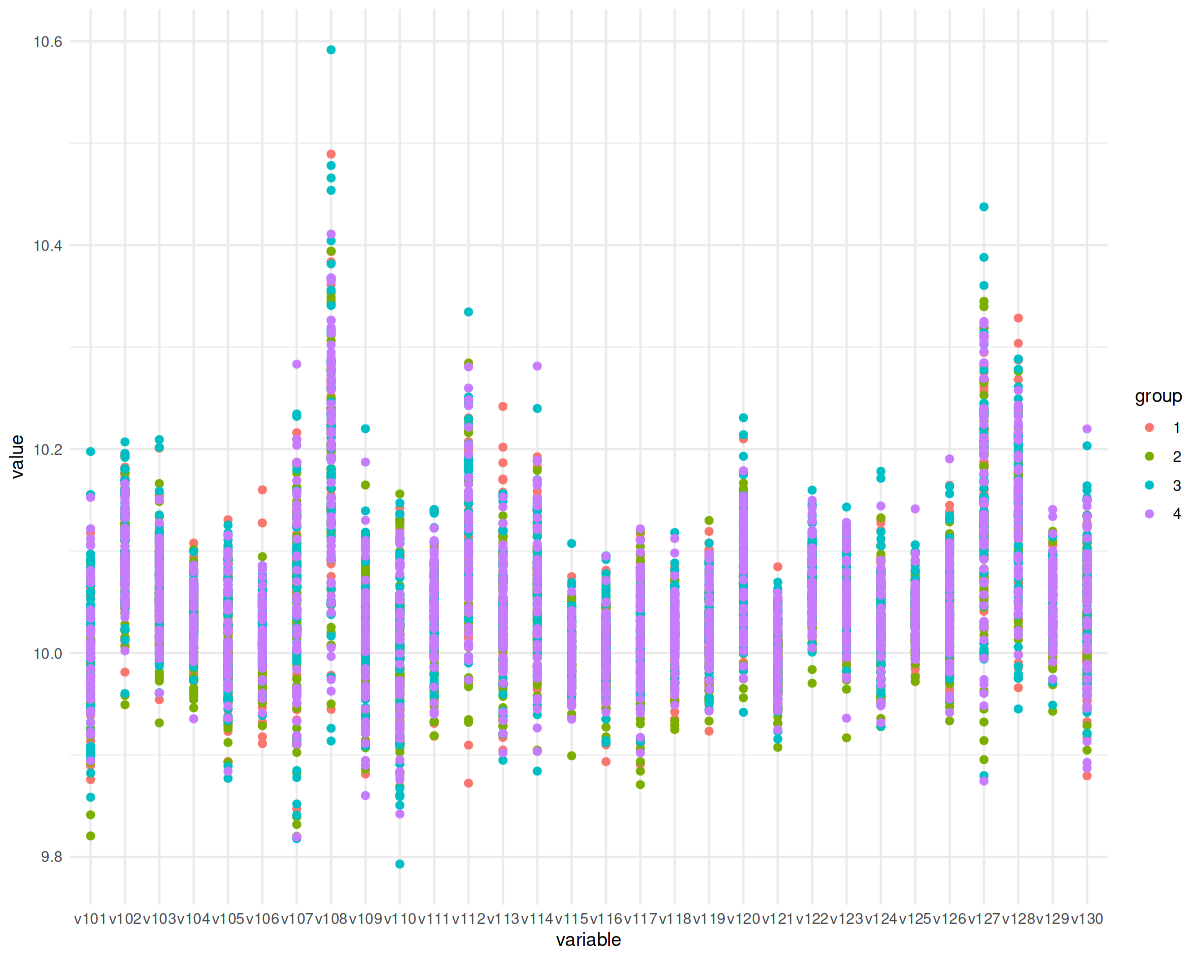

In [26]:
p + geom_point(aes(col=group))+theme_minimal()


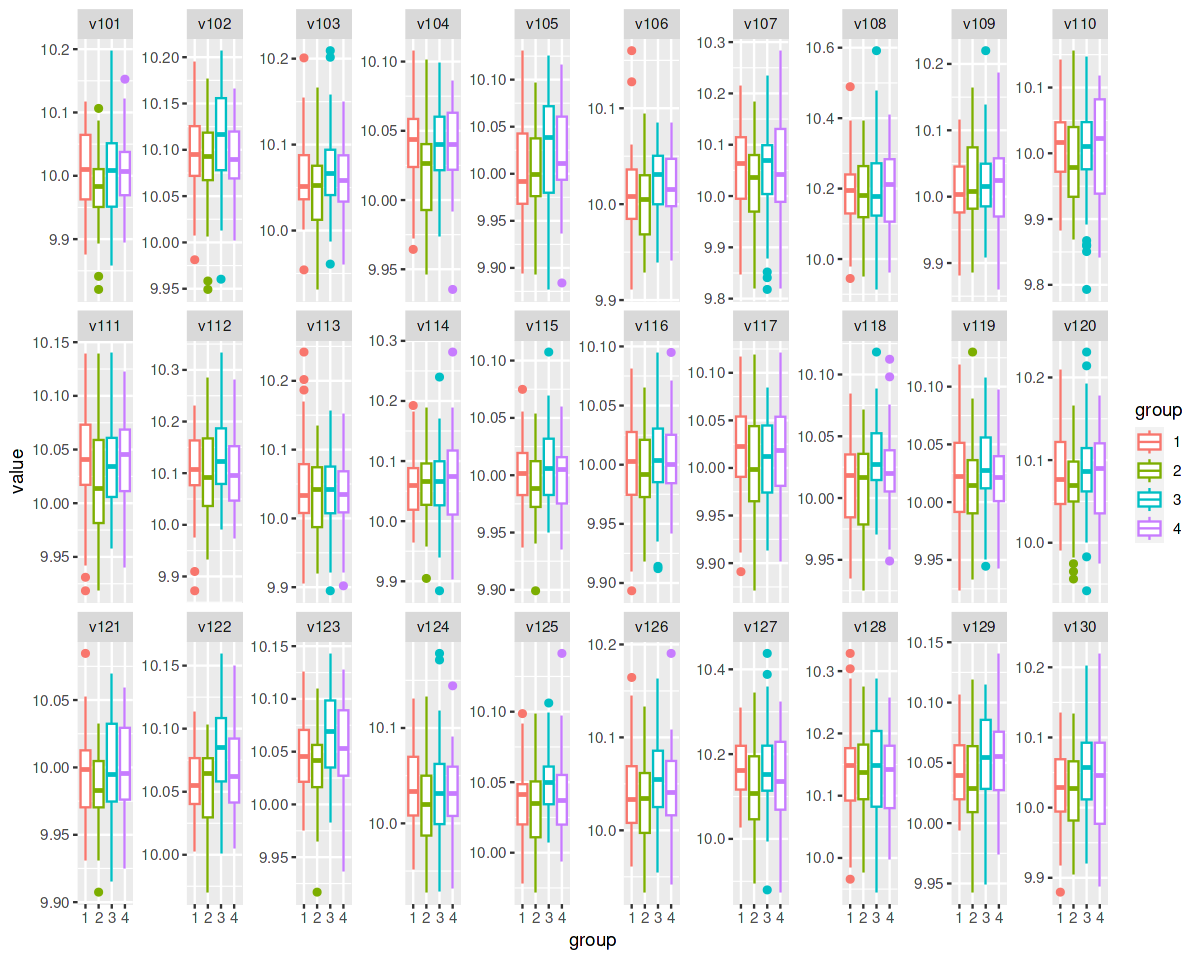

In [27]:
p3 <- ggplot(df2l, aes(x=group,y=value,col=group))+
  geom_boxplot()

p3+facet_wrap(~variable, ncol=10, scales="free_y")

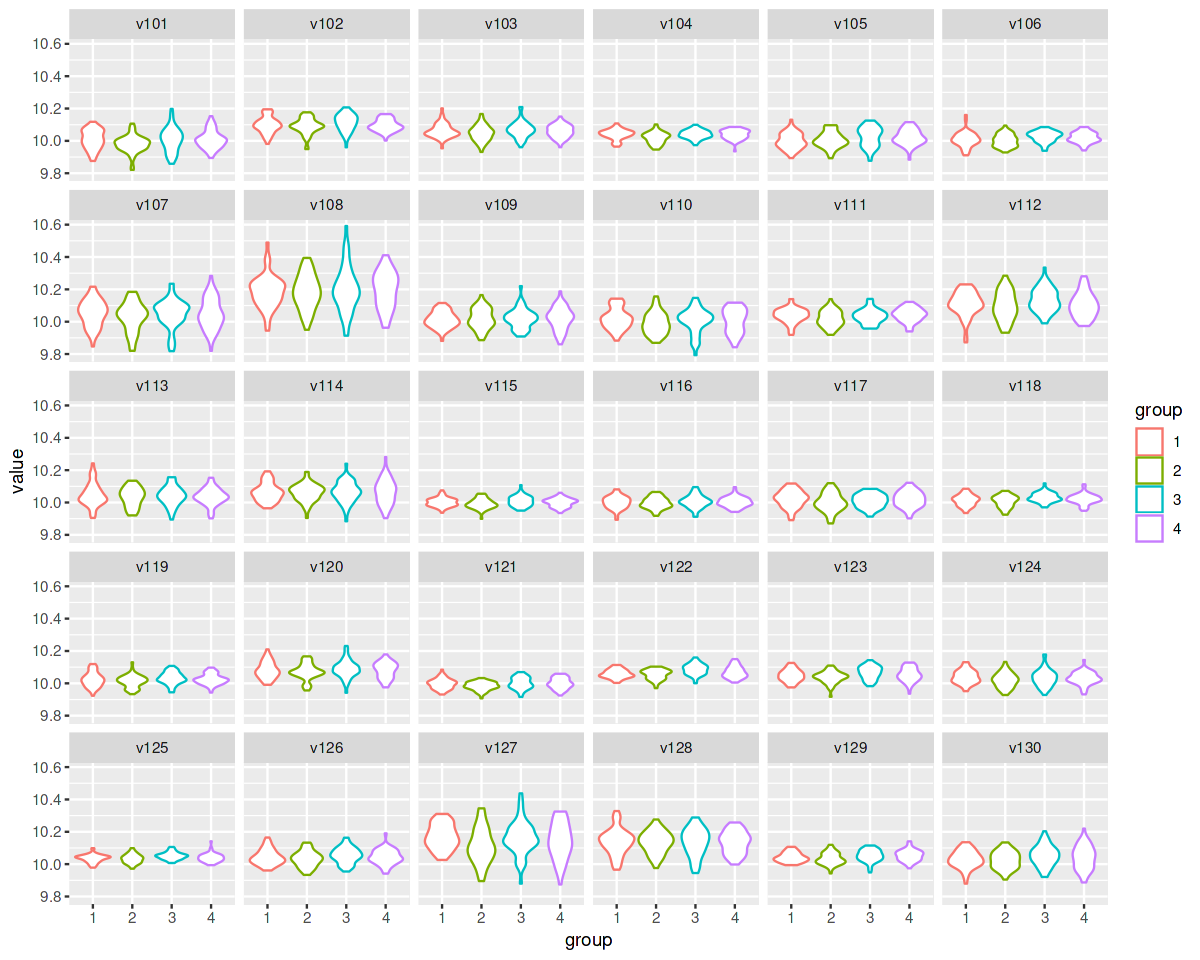

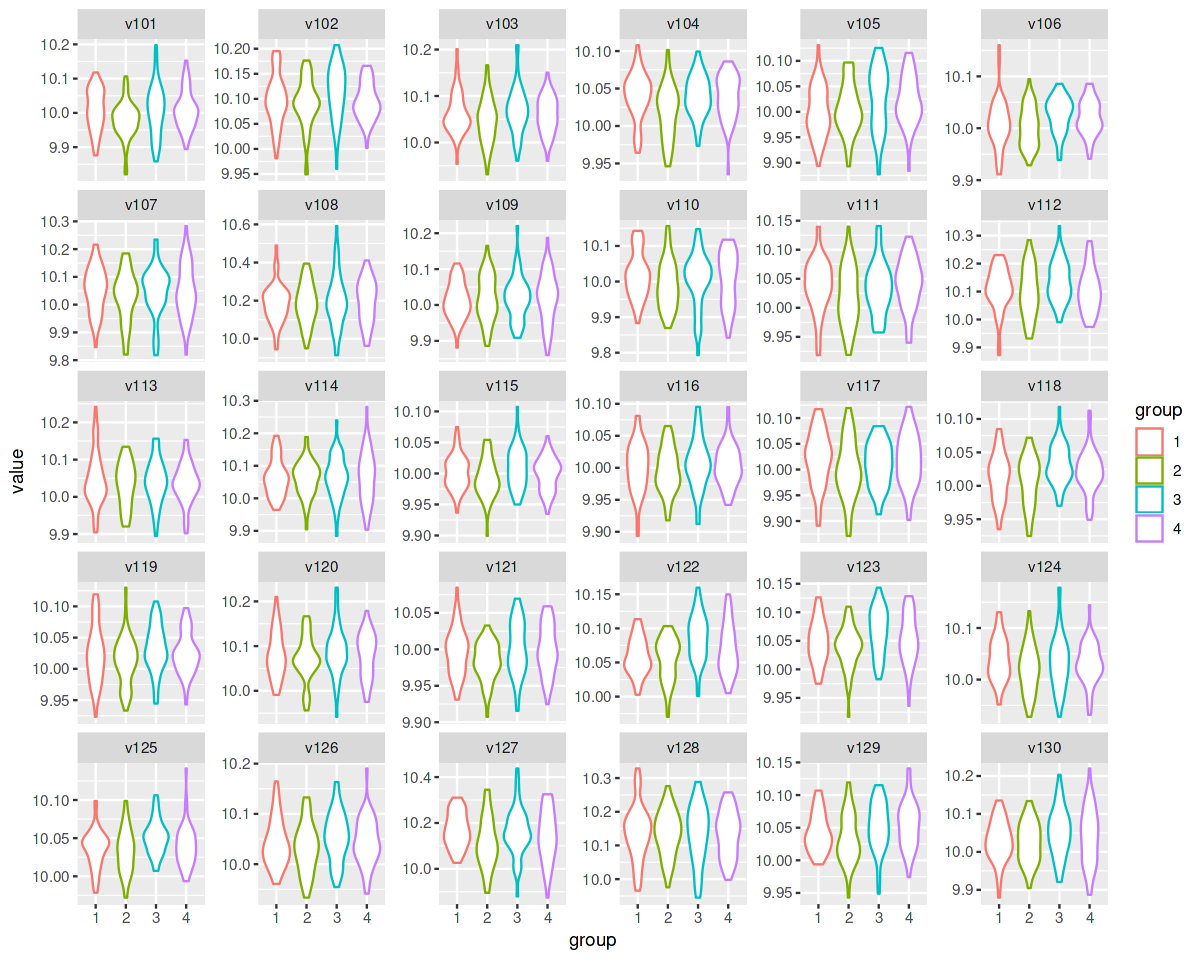

In [28]:
p2 <- ggplot(df2l, aes(x=group,y=value,col=group))+
  geom_violin()

p2+facet_wrap(~variable)
p2+facet_wrap(~variable, scales="free_y")


### Viz nanti, manova dulu
1. https://online.stat.psu.edu/stat505/lesson/8
2. [Hotelling's T Assumptions](https://online.stat.psu.edu/stat505/lesson/7/7.1/7.1.14)
3. By definition, our data is already memenuhi asumsi (by doing the correct simulation)
    1. The data from group i has common mean vector 
    1. The data from all groups have a common variance-covariance matrix
    1. Independence: The subjects are independently sampled.
    1. Normality: The data are multivariate normally distributed.
> we dont have to test its assumption right?
1. Manova: https://tjmurphy.github.io/jabstb/manova.html
   


In [29]:
library(MVN)
library(rstatix)



Attaching package: ‘rstatix’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:stats’:

    filter




In [30]:
# 15*31
15*31
rstatix::box_m(df2[,-1], df2$group)

[1] 465

statistic p.value   parameter
1 1534.511  0.0050775 1395     
  method                                             
1 Box's M-test for Homogeneity of Covariance Matrices

In [31]:
mvn(df2[df2$group==1,-1], mvnTest="energy")$multivariateNormality
mvn(df2[df2$group==2,-1], mvnTest="energy")$multivariateNormality
mvn(df2[df2$group==3,-1], mvnTest="energy")$multivariateNormality
mvn(df2[df2$group==4,-1], mvnTest="energy")$multivariateNormality

Test        Statistic p value MVN
1 E-statistic 2.853173  0.414   YES

Test        Statistic p value MVN
1 E-statistic 2.861268  0.137   YES

Test        Statistic p value MVN
1 E-statistic 2.848015  0.686   YES

Test        Statistic p value MVN
1 E-statistic 2.84572   0.787   YES

In [32]:
mvn(df2[df2$group==1,-1], mvnTest="mardia")$multivariateNormality
mvn(df2[df2$group==2,-1], mvnTest="mardia")$multivariateNormality
mvn(df2[df2$group==3,-1], mvnTest="mardia")$multivariateNormality
mvn(df2[df2$group==4,-1], mvnTest="mardia")$multivariateNormality

Test            Statistic         p value             Result
1 Mardia Skewness 4716.55257298015  0.993407357558661   YES   
2 Mardia Kurtosis -2.75962042315005 0.00578685548996072 NO    
3 MVN             NA                NA                  NO

Test            Statistic        p value            Result
1 Mardia Skewness 4696.32232032952 0.996417614389128  YES   
2 Mardia Kurtosis -2.8757516166892 0.0040306674969206 NO    
3 MVN             NA               NA                 NO

Test            Statistic         p value             Result
1 Mardia Skewness 4670.21550876174  0.998469052239804   YES   
2 Mardia Kurtosis -3.11270553456524 0.00185380880619146 NO    
3 MVN             NA                NA                  NO

Test            Statistic        p value             Result
1 Mardia Skewness 4631.59430147413 0.999619025613508   YES   
2 Mardia Kurtosis -3.1657135149167 0.00154703076721452 NO    
3 MVN             NA               NA                  NO

In [33]:
cat("cbind(", paste(colnames(df2)[-c(1,31)], ", "),"v130) ~ group")
form1 = "cbind( v101 ,  v102 ,  v103 ,  v104 ,  v105 ,  v106 ,  v107 ,  v108 ,  v109 ,  v110 ,  v111 ,  v112 ,  v113 ,  v114 ,  v115 ,  v116 ,  v117 ,  v118 ,  v119 ,  v120 ,  v121 ,  v122 ,  v123 ,  v124 ,  v125 ,  v126 ,  v127 ,  v128 ,  v129 ,  v130) ~ group"
as.formula(form1)

cbind( v101 ,  v102 ,  v103 ,  v104 ,  v105 ,  v106 ,  v107 ,  v108 ,  v109 ,  v110 ,  v111 ,  v112 ,  v113 ,  v114 ,  v115 ,  v116 ,  v117 ,  v118 ,  v119 ,  v120 ,  v121 ,  v122 ,  v123 ,  v124 ,  v125 ,  v126 ,  v127 ,  v128 ,  v129 ,  v130) ~ group

cbind(v101, v102, v103, v104, v105, v106, v107, v108, v109, v110, 
    v111, v112, v113, v114, v115, v116, v117, v118, v119, v120, 
    v121, v122, v123, v124, v125, v126, v127, v128, v129, v130) ~ 
    group

In [34]:
te1 = Sys.time()

mod <- lm(as.formula(form1), df2)

Manova(mod, test.statistic = "Roy")

te2 = Sys.time()

round(te2 - te1, 12)


Type II MANOVA Tests: Roy test statistic
      Df test stat approx F num Df den Df   Pr(>F)    
group  3   0.79744   4.4922     30    169 1.53e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Time difference of 0.04465318 secs

In [35]:

for (j in c("Pillai", "Wilks", "Hotelling-Lawley", "Roy")){
    print(Manova(mod, test.statistic = j))    
}



Type II MANOVA Tests: Pillai test statistic
      Df test stat approx F num Df den Df    Pr(>F)    
group  3   0.80076   2.0511     90    507 6.353e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Type II MANOVA Tests: Wilks test statistic
      Df test stat approx F num Df den Df    Pr(>F)    
group  3    0.3727   2.1734     90 500.66 7.387e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Type II MANOVA Tests: Hotelling-Lawley test statistic
      Df test stat approx F num Df den Df   Pr(>F)    
group  3    1.2499   2.3007     90    497 7.33e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Type II MANOVA Tests: Roy test statistic
      Df test stat approx F num Df den Df   Pr(>F)    
group  3   0.79744   4.4922     30    169 1.53e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [36]:
df4 =data.frame(group=rep(1:2,each=6), x1=scan(text="40 11.1 30 21.4 10.7 3.4 42 31.1 50 60.4 45.7 17.3"), 
                x2=scan(text="36 37.2 36.5 39.4 39.6 40.7 37.6 42.2 38.5 39.4 38.6 42.7"))

# pt
de = scale(df4[,-1], scale=F)
pt = t(de)%*%de

# pw
deg= df4

pw = matrix(0, nrow=2, ncol=2)
for (j in 1:2){
    dei = deg[deg[,1]==j,-1]
    dei = scale(dei, scale=F)
    pw = pw+t(dei)%*%dei
}

pb = pt-pw
es = solve(pw)%*%pb
lam = eigen(es)$values



sum(lam/(1+lam)) #pillai
sum(1/(1+lam)) #wilk

sum(lam) # hotelling
max(lam) # roy


[1] 0.7780876

[1] 1.221912

[1] 3.506282

[1] 3.506282

In [37]:
# pt
de = scale(df2[,-1], scale=F)
pt = t(de)%*%de

# pw
deg= df2

pw = matrix(0, nrow=30, ncol=30)
for (j in 1:4){
    dei = deg[deg[,1]==j,-1]
    dei = scale(dei, scale=F)
    pw = pw + t(dei)%*%dei
}

pb = pt-pw
es = solve(pw)%*%pb
lam = Re(eigen(es)$values)

sum(lam/(1+lam)) #pillai
sum(1/(1+lam)) #wilk

sum(lam) # hotelling
max(lam) # roy

# lam


[1] 0.8007571

[1] 29.19924

[1] 1.249871

[1] 0.7974394

In [38]:
# between hypothesis 0 or 0 yeah
# within == total --> no difference.
max(Re(eigen(solve(pw)%*%pb)$values))
max(Re(eigen(pb%*%solve(pw))$values)) # eq. HE-1


[1] 0.7974394

[1] 0.7974394

In [39]:
# fRoy for one way Manova 4 group
# 12 Johnston 2009
fRoy = function(data, xcol=1){
    pe = ncol(data)-1
    en = nrow(data)
    
    de = scale(data[,-xcol], scale=F)
    pt = t(de)%*%de
    
    deg= data
    pw = matrix(0, nrow=pe, ncol=pe)
    for (j in 1:4){
        dei = deg[deg[, xcol]==j, -xcol]
        dei = scale(dei, scale=F)
        pw = pw + t(dei)%*%dei
    }
    
    pb = pt-pw
    
    te0 = Sys.time()
    
    # lambda
    es  = solve(pw)%*%pb    
    lam = sort(Re(eigen(es)$values))
    
    # ksi
    es2 = solve(pt)%*%pb    
    ksi = sort(Re(eigen(es2)$values))

    stat= max(lam) # roy

    te1 = Sys.time()
    time= te1-te0
    
    # hypothesis test
    df1 = pe
    df2 = en-pe-1
    ef1 = df2/df1*stat
    ef0 = qf(0.95, df1, df2)
    pval= pf(ef1, df1, df2, lower=F)
    
    # output
    luaran=list()
    luaran$info = data.frame(stat, ef1, ef0, df1, df2, pval)
    luaran$p = pe
    luaran$H = pb
    luaran$E = pw
    
    luaran$lam = lam
    luaran$ksi = ksi
    
    luaran$te  = time
    return(luaran)
    
}

In [40]:
Manova(mod, test.statistic = "Roy")
fRoy(df2)$info


Type II MANOVA Tests: Roy test statistic
      Df test stat approx F num Df den Df   Pr(>F)    
group  3   0.79744   4.4922     30    169 1.53e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

stat      ef1      ef0      df1 df2 pval        
1 0.7974394 4.492242 1.526825 30  169 1.529905e-10

In [41]:
# okeu nice.
lam2 = fRoy(df2)$lam
round(fRoy(df2)$ksi - lam2/(1+lam2),10)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [42]:
2718.5*30/169

[1] 482.574

In [43]:
# create multivariate normal distribution 
df3 = data.frame(cbind("group"=c(rep(1:4, each=9)), 
                       rbind(mvrnorm(n = 9, mu = mu1, Sigma = cov1),
                             mvrnorm(n = 9, mu = 0.008+mu1, Sigma = cov1),
                             mvrnorm(n = 9, mu = mu1, Sigma = cov1),
                            mvrnorm(n = 9, mu = mu1, Sigma = cov1))))


df3$group = as.factor(df3$group)

fRoy(df3)$stat

NULL

In [44]:
Manova(manova(as.formula(form1),df3), test="Roy",)


Type II MANOVA Tests: Roy test statistic
      Df test stat approx F num Df den Df  Pr(>F)  
group  3    44.662   7.4437     30      5 0.01686 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [45]:
# qf(0.4776181175, 30, 169,lower=F)
pf( 6.8015 , 30, 9, lower.tail=F)
qf(0.95, 30, 9)


# versi bookdown
ha = 4-1 # number of k?
ee = 10-1
pe = 30

v1 = (abs(pe-ha)-1)/2
v2 = 0.5*(abs(ee-pe)-1)
(2*v1+2);(2*v2+2)

f = ((2*v2+2)/(2*v1+2))* 22.672
f

pf(f, 22, 28, lower.tail=F)
qf(0.95, 22, 28)


# 9/30*22.672


[1] 0.002440503

[1] 2.863652

[1] 28

[1] 22

[1] 17.81371

[1] 3.548161e-11

[1] 1.934871

In [46]:
1/(2*v1+2)*(2*v2+2)*0.3

[1] 0.2357143